In [1]:
import pandas as pd

In [2]:
data =pd.read_csv('/home/deslin/Documents/ML Projects1/Linear Regression/Advertisement vs Sales Prediction/Advertising.csv')

In [3]:
data.shape

(200, 5)

In [4]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
data.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

In [6]:
data.isna().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [7]:
data = data.drop('Unnamed: 0',axis = 1)
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [8]:
#checking oulier values

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
cols =data.columns
cols

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [11]:
import warnings
warnings.filterwarnings('ignore')

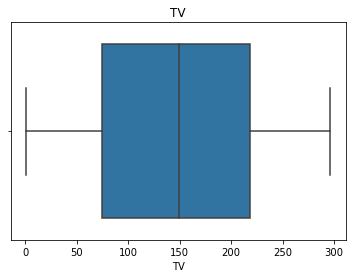

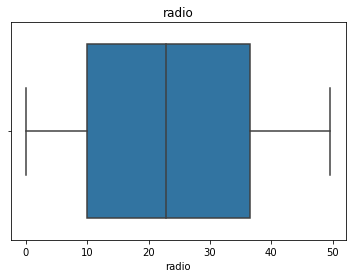

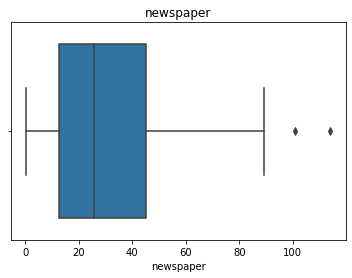

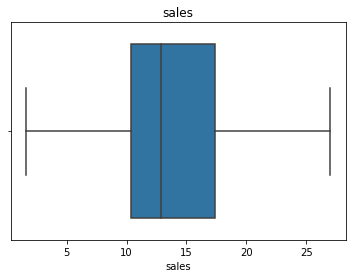

In [12]:
for x in cols:
    sns.boxplot(data[x],orient='h')
    plt.title(x)
    plt.show()

In [14]:
desc = data['newspaper'].describe()
desc

count    200.000000
mean      30.554000
std       21.778621
min        0.300000
25%       12.750000
50%       25.750000
75%       45.100000
max      114.000000
Name: newspaper, dtype: float64

In [15]:
IQR = desc['75%'] - desc['25%']
upper_limit = desc['75%'] + 1.5*IQR

In [16]:
data['newspaper'][data['newspaper']>upper_limit] = upper_limit

In [17]:
##checking corelation with target variable
data.corr()['sales']

TV           0.782224
radio        0.576223
newspaper    0.231432
sales        1.000000
Name: sales, dtype: float64

In [ ]:
#splitting into input and output vectors

In [22]:
y = data['sales']
x = data.drop('sales',axis = 1)

In [23]:
x.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [24]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [25]:
#import train_test_split to split the data for training and testing

from sklearn.model_selection import train_test_split #we are only importing  train_test_split function from sklearn within the class model_selection

#train_test_split is splitiing the data randomnly

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25) #75% data will be for training and 25% data for testing

In [26]:
from sklearn.linear_model import LinearRegression  #importing LinearRegression from sklearn within the class linear_model

In [30]:
lin_reg = LinearRegression() #creating object of LinearRegression

In [31]:
lin_reg.fit(x_train,y_train) #training and fitting LR object using training data

LinearRegression()

In [32]:
m  = lin_reg.coef_
print(m)

[ 0.0448282   0.19240372 -0.0096238 ]


In [34]:
c = lin_reg.intercept_
c

3.3159856167920534

In [36]:
ypred=lin_reg.predict(x_test)  #ypred consist of the predicted salary corresponding to X_test

In [37]:
ypred

array([13.53415167, 17.65463662, 11.87349859, 17.48938259,  5.67680874,
       15.28838242, 14.88473813,  7.67317796, 12.93867431, 17.85752251,
       14.13221998, 19.88783628,  9.71757383, 15.37217029, 14.997756  ,
       12.49628542,  9.91223059, 16.2072888 , 17.61417464, 15.40891335,
       17.05459538, 18.77565356,  9.75309152, 16.52038606,  8.40362722,
        8.8983021 , 14.06463144, 19.22366458, 20.57138984, 12.56888447,
       13.57136204, 13.81387746, 22.68629008, 17.30441973,  8.96923852,
       19.18071461, 10.04746493, 17.4907389 , 21.94617687, 17.14971371,
       20.65894015, 21.21949472, 10.18625761, 11.62125718, 15.19133694,
       10.88282568, 11.87783126, 19.8257493 , 14.44236014, 20.48247322])

In [38]:
from sklearn.metrics import mean_squared_error #calculating MSE
MSE=mean_squared_error(ypred,y_test)
print("MSE for Testing:",MSE)

MSE for Testing: 3.8832682251282824


In [39]:
#Training Error
y_pred_training = lin_reg.predict(x_train)
MSE_training=mean_squared_error(y_pred_training,y_train)
print("MSE for Training:",MSE_training)

MSE for Training: 2.473260515775787


In [41]:
lin_reg.score(x_train,y_train)

0.9116404817262131

In [43]:
lin_reg.score(x_test,y_test)  #R-square value

0.8374162403916294